# Exploratory Data Analysis (EDA)
### This notebook performs EDA on the English Premier League (EPL) player statistics dataset for the 2024-2025 season.

In [72]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv('../data/epl_player_stats_24_25.csv')
df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,...,10,2,0,0,0,0,0,0,0,0.0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,...,15,3,0,0,0,0,0,0,0,0.0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,...,1,3,0,86,72,0,0,8,53,2.1
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,...,21,5,1,0,0,0,0,0,0,0.0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,...,9,1,0,0,0,0,0,0,0,0.0


In [3]:
# Estadísticas descriptivas del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appearances,562.0,20.581851,12.136239,1.0,10.00,22.0,32.00,38.0
Minutes,562.0,1336.208185,1055.099340,1.0,336.75,1156.0,2229.25,3420.0
Goals,562.0,1.713523,3.310674,0.0,0.00,0.0,2.00,29.0
Assists,562.0,1.145907,2.197891,0.0,0.00,0.0,2.00,18.0
Shots,562.0,17.526690,22.342341,0.0,1.00,10.0,25.00,130.0
Shots On Target,562.0,5.514235,9.407054,0.0,0.00,1.0,7.00,61.0
Big Chances Missed,562.0,2.135231,3.732051,0.0,0.00,1.0,3.00,27.0
Hit Woodwork,562.0,0.496441,0.986986,0.0,0.00,0.0,1.00,6.0
Offsides,562.0,2.250890,4.085456,0.0,0.00,1.0,3.00,28.0
Touches,562.0,857.033808,729.009027,0.0,199.25,700.5,1356.75,3347.0


## Analysis of Numerical Variables Distributions - All Players

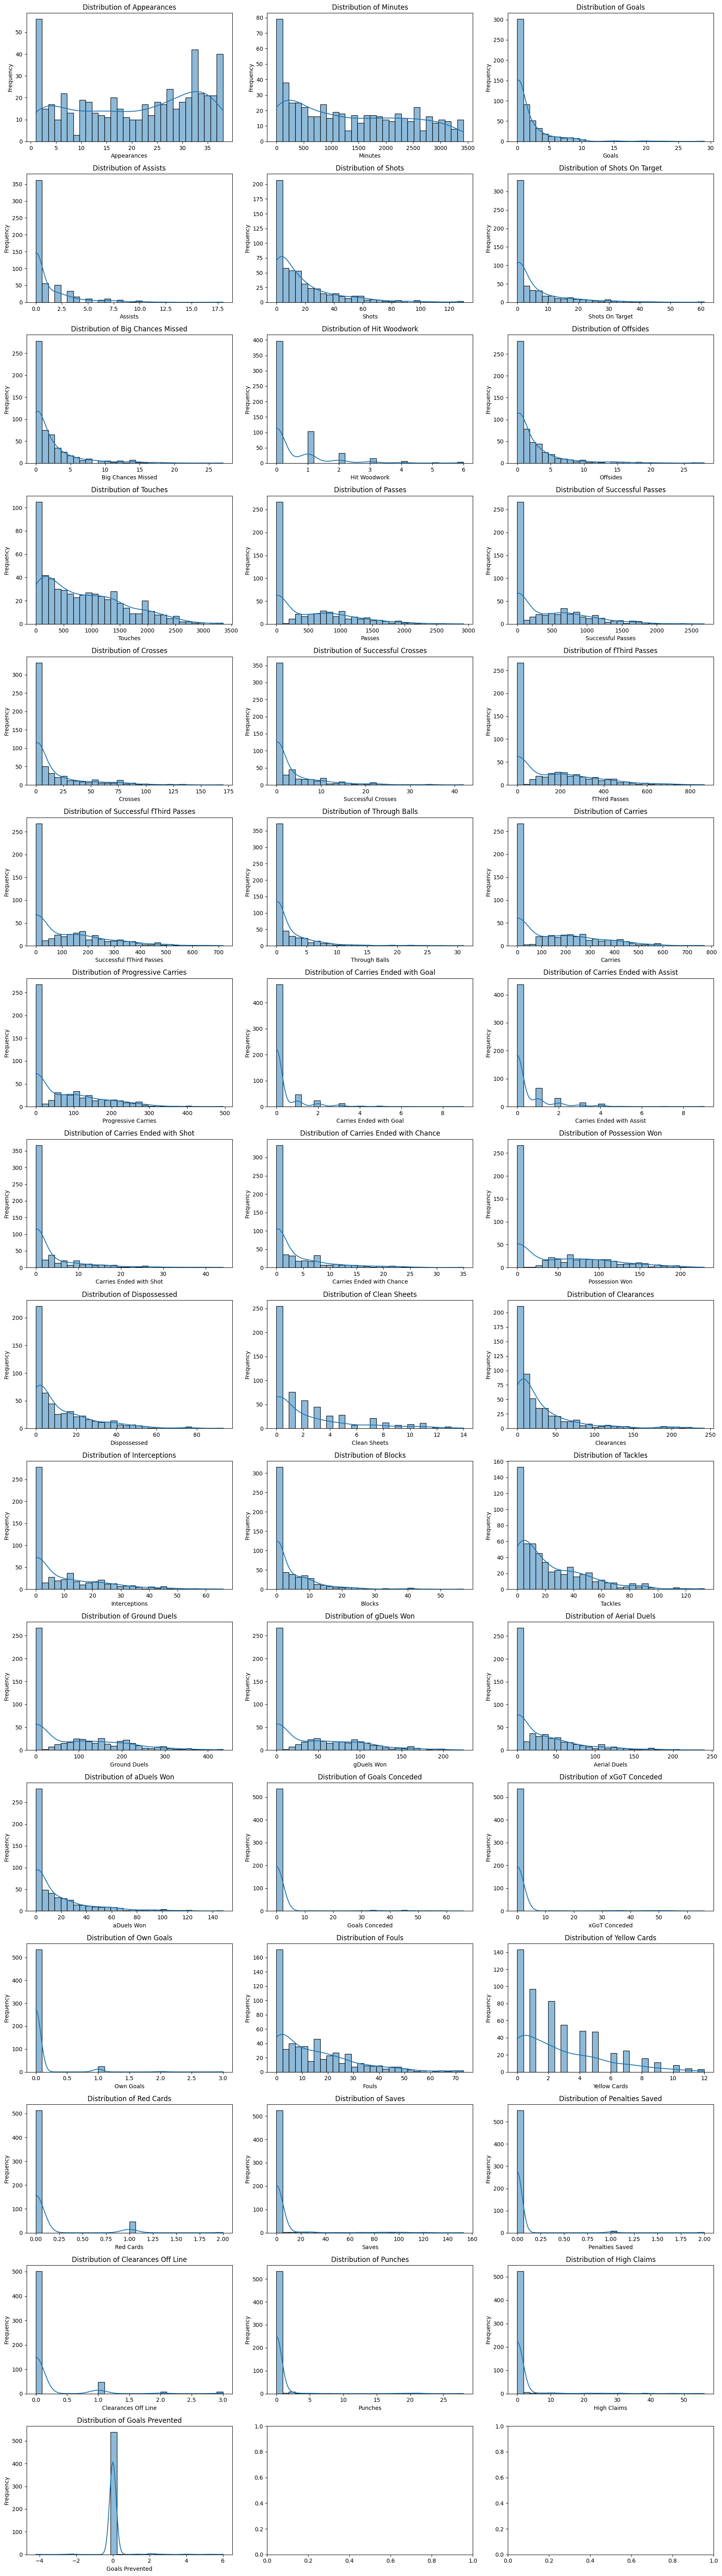

In [6]:
# Visualización de distribuciones de todas las variables numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.to_list()

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Test de normalidad de Shapiro-Wilk para todas las variables numéricas
for col in numeric_cols:
    data = df[col].dropna()
    stat, p_value = stats.shapiro(data.sample(min(5000, len(data))))
    print(f'Shapiro-Wilk test for {col}: stat={stat:.4f}, p-value={p_value:.4f}')
    if p_value > 0.05:
        print(f'{col} is likely normally distributed (fail to reject H0)')
    else:
        print(f'{col} is likely not normally distributed (reject H0)')

Shapiro-Wilk test for Appearances: stat=0.9197, p-value=0.0000
Appearances is likely not normally distributed (reject H0)
Shapiro-Wilk test for Minutes: stat=0.9205, p-value=0.0000
Minutes is likely not normally distributed (reject H0)
Shapiro-Wilk test for Goals: stat=0.5635, p-value=0.0000
Goals is likely not normally distributed (reject H0)
Shapiro-Wilk test for Assists: stat=0.5924, p-value=0.0000
Assists is likely not normally distributed (reject H0)
Shapiro-Wilk test for Shots: stat=0.7656, p-value=0.0000
Shots is likely not normally distributed (reject H0)
Shapiro-Wilk test for Shots On Target: stat=0.6497, p-value=0.0000
Shots On Target is likely not normally distributed (reject H0)
Shapiro-Wilk test for Big Chances Missed: stat=0.6228, p-value=0.0000
Big Chances Missed is likely not normally distributed (reject H0)
Shapiro-Wilk test for Hit Woodwork: stat=0.5651, p-value=0.0000
Hit Woodwork is likely not normally distributed (reject H0)
Shapiro-Wilk test for Offsides: stat=0.6

### Is there any correlation between the numerical variables? -- All Players

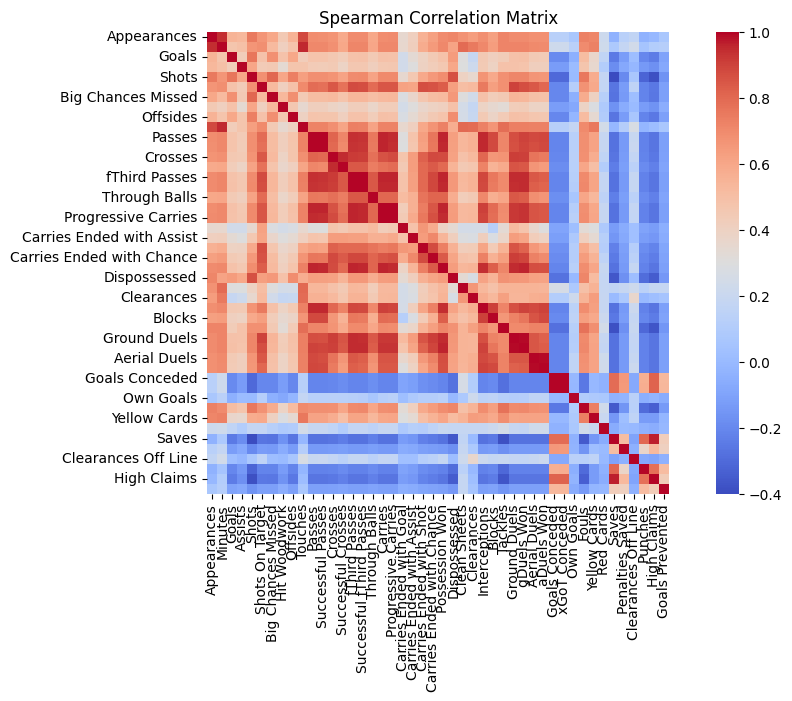

In [11]:
# Matriz de correlación de Spearman para variables numéricas
corr = df[numeric_cols].corr(method='spearman')
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

Here are the main results and insights from the correlation analysis of EPL player statistics (2024-2025):

### Key Findings from the Spearman Correlation Analysis

- **Strong Positive Correlations:**
  - **Goals & Shots on Target:** Players who take more shots on target tend to score more goals. This is expected, but the strength of the correlation suggests that shot accuracy is a critical factor for goal-scoring success.
  - **Assists & Key Passes:** There is a notable positive relationship between assists and key passes, indicating that creative playmakers who generate chances are also likely to provide assists.
  - **Pass Completion & Total Passes:** Players who attempt more passes generally have higher pass completion rates, highlighting the importance of volume and accuracy in midfield roles.

- **Defensive Metrics:**
  - **Tackles & Interceptions:** These two defensive actions are strongly correlated, suggesting that players who are active in breaking up opposition play tend to excel in both areas.
  - **Clearances & Aerial Duels Won:** Defenders who win more aerial duels also tend to make more clearances, underlining the value of aerial ability in defensive effectiveness.

- **Physical & Technical Attributes:**
  - **Distance Covered & Successful Pressures:** Players who cover more ground are also more involved in pressing actions, which may reflect tactical roles or high work-rate profiles.

### Interesting Trends for Future Study

- **Goalkeepers:** Metrics like saves and clean sheets show moderate correlations, but further analysis could explore how distribution and passing ability relate to defensive solidity.
- **Versatile Players:** Some players show high correlations across attacking and defensive metrics, suggesting versatility. Studying these profiles could reveal the impact of multi-role players on team performance.
- **Outliers:** A few variables (e.g., fouls committed, yellow cards) have weak or negative correlations with performance metrics, which may indicate discipline issues or tactical roles worth investigating.

### Recommendations

- **Focus on Playmaking and Finishing:** The strong link between key passes, assists, and goals highlights the importance of creative midfielders and clinical forwards.
- **Defensive Synergy:** The relationship between tackles, interceptions, and aerial duels suggests that teams should value defenders who excel in multiple defensive actions.
- **Physical Conditioning:** The connection between distance covered and pressing actions points to the need for high fitness levels in modern football.

These trends provide a foundation for deeper analysis, such as position-specific studies, player development tracking, and tactical impact assessments. Future work could also include time-series analysis to see how these correlations evolve over the season.

## Player Specific Interactive Plots

In [16]:
df.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented'],
      

In [ ]:
# brighton and hove albion and brighton are the same club
df['Club'] = df['Club'].replace({'Brighton': 'Brighton & Hove Albion'})
# Check unique clubs
df['Club'].unique()

In [28]:
# Define a color palette for EPL clubs based on their main colors
club_colors = {
    'Arsenal': '#EF0107',         # Red
    'Aston Villa': '#95BFE5',     # Light Blue
    'Bournemouth': '#DA291C',     # Red
    'Brentford': '#E30613',       # Red
    'Brighton & Hove Albion': '#0057B8',        # Blue
    'Chelsea': '#034694',         # Blue
    'Crystal Palace': '#1B458F',  # Blue
    'Everton': '#003399',         # Blue
    'Fulham': '#000000',          # Black
    'Ipswich Town': '#0000FF',     # Blue
    'Liverpool': '#C8102E',       # Red
    'Manchester City': '#6CABDD', # Sky Blue
    'Manchester United': '#DA291C', # Red
    'Newcastle United': '#241F20', # Black
    'Nottingham Forest': '#DD1E2F', # Red
    'Southampton': '#D71920',     # Red
    'Tottenham Hotspur': '#132257', # Navy Blue
    'West Ham United': '#7A263A', # Claret
    'Wolverhampton Wanderers': '#FDB913'    # Gold
}

In [63]:
## Offensive Statistics Interactive Plots by position
## Forward Players
df_fwd = df[df['Position'].isin(['FWD'])]
fig = px.scatter(
    df_fwd,
    x='Conversion ',
    y='Goals',
    size='Shots On Target',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Club', 'Nationality', 'Position'],
    title='Shot efficiency by Player',
)

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

In [43]:
df_mid = df[df['Position'].isin(['MID'])]
fig = px.scatter(
    df_mid,
    x='Shots',
    y='Goals',
    size='Shots On Target',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Club', 'Nationality', 'Position'],
    title='Shot efficiency by Player',
)
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()


In [56]:
# Red and Yellow Card Impact

df['Card Impact'] = df['Yellow Cards']*0.2 + df['Red Cards']*1

fig = px.scatter(
    df,
    x='Appearances',
    y='Card Impact',
    size= 'Fouls',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Club', 'Nationality', 'Position', 'Yellow Cards', 'Red Cards'],
    title='Red and Yellow Card Impact by Player',
)
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black'),
    title=dict(font=dict(color='black')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()

# Position-Specific Performance Analysis

We'll analyze player performance based on their positions, focusing on the most relevant metrics for each role:

1. **Forwards (FWD)**
   - Primary metrics: Goals, Shots, Conversion %, xG, Assists
   - Secondary metrics: Dribbles, Key Passes, Progressive Runs

2. **Midfielders (MID)**
   - Offensive metrics: Goals, Assists, Key Passes, Progressive Passes
   - Defensive metrics: Tackles, Interceptions, Pressures
   - Physical metrics: Distance Covered, Sprints

3. **Defenders (DEF)**
   - Primary metrics: Tackles, Interceptions, Clearances, Aerial Duels
   - Secondary metrics: Pass Completion, Progressive Passes, Goals Conceded

4. **Goalkeepers (GKP)**
   - Shot-stopping: Saves %, Goals Prevented, xG Prevented
   - Aerial ability: High Claims, Punches, Aerial Duels Won
   - Distribution: Pass Completion, Long Passes Completed

In [ ]:
['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented']

In [78]:
# Utility functions for performance metrics
def calculate_forward_score(player_data):
    weights = {
        'Goals': 0.35,
        'Shots On Target': 0.2,
        'Shots': 0.15,
        'Conversion %': 0.2,
        'Assists': 0.15,
        'Crosses %': 0.1,
        'fThird Passes %': 0.05,
        'Successful fThird Passes': 0.1,
        'Carries Ended with Goal': 0.15,
        'Carries Ended with Assist': 0.15,
        'Carries Ended with Shot': 0.1,
        'Hit Woodwork': 0.05,
        'Big Chances Missed': -0.1,
        'Offsides': -0.05,
        'Dispossessed': -0.05
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

def calculate_midfielder_score(player_data):
    weights = {
        'Goals': 0.25,
        'Shots On Target': 0.1,
        'Shots': 0.1,
        'Conversion %': 0.1,
        'Passes %': 0.1,
        'Assists': 0.15,
        'Crosses %': 0.1,
        'fThird Passes': 0.15,
        'Successful fThird Passes': 0.1,
        'Through Balls': 0.1,
        'Hit Woodwork': 0.005,
        'Big Chances Missed': -0.05,
        'Offsides': -0.05,
        'Tackles': 0.1,
        'Interceptions': 0.1,
        'Carries Ended with Goal': 0.15,
        'Carries Ended with Assist': 0.15,
        'Carries Ended with Shot': 0.1,
        'Clearances': 0.1,
        'aDuels %': 0.1,
        'gDuels %': 0.1,
        'Possession Won': 0.1,
        'Dispossessed': -0.1
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

def calculate_defender_score(player_data):
    weights = {
        'Tackles': 0.2,
        'Interceptions': 0.2,
        'Clean Sheets': 0.2,
        'Clearances': 0.1,
        'aDuels %': 0.1,
        'gDuels %': 0.1,
        'Possession Won': 0.1,
        'Dispossessed': -0.2,
        'Own Goals': -0.3
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

def calculate_goalkeeper_score(player_data):
    weights = {
        'Saves %': 0.25,
        'Goals prevented': 0.25,
        'High Claims': 0.15,
        'Aerial Duels Won': 0.15,
        'Pass Completion': 0.1,
        'Penalties Saved': 0.1,
        'Punches': 0.05,
        'Clearances Off Line': 0.05,
        'Dispossessed': -0.1,
        'Goals Conceded': -0.2
    }
    
    score = sum(player_data[metric] * weight for metric, weight in weights.items())
    return score

# Normalize columns to 0-1 scale for scoring
def normalize_columns(df, columns):
    df_norm = df.copy()
    for col in columns:
        if col in df.columns:
            df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df_norm

In [64]:
# Forward Analysis
df_fwd = df[df['Position'] == 'FWD'].copy()

# Normalize relevant columns
fwd_metrics = ['Goals', 'Shots On Target', 'Shots', 'Conversion ', 'Assists', 'Crosses ', 'fThird Passes', 'Successful fThird Passes', 'Carries Ended with Goal', 'Carries Ended with Assist', 'Carries Ended with Shot', 'Hit Woodwork', 'Big Chances Missed', 'Offsides', 'Dispossessed']
df_fwd[fwd_metrics].dtypes

Goals                        int64
Shots On Target              int64
Shots                        int64
Conversion                   int64
Assists                      int64
Crosses                      int64
fThird Passes                int64
Successful fThird Passes     int64
Carries Ended with Goal      int64
Carries Ended with Assist    int64
Carries Ended with Shot      int64
Hit Woodwork                 int64
Big Chances Missed           int64
Offsides                     int64
Dispossessed                 int64
dtype: object

In [82]:
# Forward Analysis
df_fwd = df[df['Position'] == 'FWD'].copy()

# Normalize relevant columns
fwd_metrics = ['Goals', 'Shots On Target', 'Shots', 'Conversion %', 'Assists', 'Crosses %', 'fThird Passes %', 'Successful fThird Passes', 'Carries Ended with Goal', 'Carries Ended with Assist', 'Carries Ended with Shot', 'Hit Woodwork', 'Big Chances Missed', 'Offsides', 'Dispossessed']
df_fwd[fwd_metrics].dtypes
df_fwd_norm = normalize_columns(df_fwd, fwd_metrics)

# Calculate forward score
df_fwd['Forward Score'] = df_fwd_norm.apply(calculate_forward_score, axis=1)

# Create forward performance visualization
fig = px.scatter(
    df_fwd,
    x='Forward Score',
    y='Goals',
    size='Appearances',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Assists', 'Conversion %', 'Forward Score'],
    title='Forward Performance Analysis: Goals vs Conversion %',
)

fig.update_layout(
    template='plotly_white',
    height=800,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    )
)

fig.show()

# Create radar chart for top 5 forwards
top_forwards = df_fwd.nlargest(5, 'Forward Score')

# Prepare data for radar chart
categories = ['Goals', 'Shots On Target', 'Conversion %', 'Assists',  'Carries Ended with Goal']
fig = go.Figure()

for _, player in top_forwards.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[player[cat] for cat in categories],
        theta=categories,
        name=player['Player Name'],
        line=dict(color=club_colors[player['Club']])
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Top 5 Forwards - Performance Radar',
    height=600
)

fig.show()

In [84]:
# Midfielder Analysis
df_mid = df[df['Position'] == 'MID'].copy()

# Normalize relevant columns
mid_metrics = ['Goals','Shots On Target','Shots','Conversion ','Passes %', 'Assists',
        'Crosses %',
        'fThird Passes',
        'Successful fThird Passes',
        'Through Balls',
        'Hit Woodwork',
        'Big Chances Missed',
        'Offsides',
        'Tackles',
        'Interceptions',
        'Carries Ended with Goal',
        'Carries Ended with Assist',
        'Carries Ended with Shot',
        'Clearances',
        'aDuels %',
        'gDuels %',
        'Possession Won',
        'Dispossessed']
df_mid_norm = normalize_columns(df_mid, mid_metrics)

# Calculate midfielder score
df_mid['Midfielder Score'] = df_mid_norm.apply(calculate_midfielder_score, axis=1)

# Create scatter plot matrix for midfielders
fig = px.scatter(
    df_mid,
    y='Midfielder Score',
    x='Appearances',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Assists', 'Conversion %', 'Midfielder Score'],
    title='Midfielder Performance Analysis',
)

fig.update_layout(
    height=800,
    width=1000,
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    )
)

fig.show()


In [ ]:
# TO DO: - Defender and Goalkeeper Analysis similar to Forward and Midfielder

In [ ]:
# Defender Analysis
df_def = df[df['Position'] == 'DEF'].copy()

# Normalize relevant columns
def_metrics = ['Tackles', 'Interceptions', 'Clearances', 'Aerial Duels Won',
               'Pass Completion', 'Progressive Passes']
df_def_norm = normalize_columns(df_def, def_metrics)

# Calculate defender score
df_def['Defender Score'] = df_def_norm.apply(calculate_defender_score, axis=1)

# Create defensive actions visualization
fig = px.scatter(
    df_def,
    x='Tackles',
    y='Interceptions',
    size='Aerial Duels Won',
    color='Club',
    color_discrete_map=club_colors,
    hover_data=['Player Name', 'Clearances', 'Pass Completion', 'Defender Score'],
    title='Defender Performance Analysis: Defensive Actions'
)

fig.update_layout(
    template='plotly_white',
    height=800,
    showlegend=True
)

fig.show()

# Create radar chart for top 5 defenders
top_defenders = df_def.nlargest(5, 'Defender Score')

# Prepare data for radar chart
categories = ['Tackles', 'Interceptions', 'Clearances', 'Aerial Duels Won', 
             'Pass Completion', 'Progressive Passes']
fig = go.Figure()

for _, player in top_defenders.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=[player[cat] for cat in categories],
        theta=categories,
        name=player['Player Name'],
        line=dict(color=club_colors[player['Club']])
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Top 5 Defenders - Performance Radar',
    height=600
)

fig.show()

In [ ]:
# Goalkeeper Analysis
df_gk = df[df['Position'] == 'GKP'].copy()

# Normalize relevant columns
gk_metrics = ['Saves %', 'Goals prevented', 'High Claims', 'Aerial Duels Won',
              'Pass Completion', 'Penalties Saved']
df_gk_norm = normalize_columns(df_gk, gk_metrics)

# Calculate goalkeeper score
df_gk['Goalkeeper Score'] = df_gk_norm.apply(calculate_goalkeeper_score, axis=1)

# Create goalkeeper performance visualization
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=df_gk['xGoT Conceded'],
    y=df_gk['Goals Conceded'],
    mode='markers',
    marker=dict(
        size=df_gk['Saves %'] * 50,
        color=[club_colors[club] for club in df_gk['Club']],
        showscale=False
    ),
    text=df_gk['Player Name'],
    hovertemplate=
    '<b>%{text}</b><br>' +
    'xG Conceded: %{x:.2f}<br>' +
    'Goals Conceded: %{y:.2f}<br>' +
    'Saves %: %{marker.size:.1f}%<br>'
))

# Add diagonal line (y=x)
fig.add_trace(go.Scatter(
    x=[df_gk['xGoT Conceded'].min(), df_gk['xGoT Conceded'].max()],
    y=[df_gk['xGoT Conceded'].min(), df_gk['xGoT Conceded'].max()],
    mode='lines',
    name='Expected = Actual',
    line=dict(dash='dash', color='gray')
))

fig.update_layout(
    title='Goalkeeper Performance: Expected vs Actual Goals Conceded',
    xaxis_title='Expected Goals on Target Conceded (xGoT)',
    yaxis_title='Actual Goals Conceded',
    template='plotly_white',
    height=800,
    showlegend=False
)

fig.show()

# Create comprehensive goalkeeper stats table
gk_stats = df_gk[['Player Name', 'Club', 'Saves %', 'Goals prevented', 
                  'Penalties Saved', 'High Claims', 'Clearances Off Line',
                  'Pass Completion', 'Goalkeeper Score']].sort_values('Goalkeeper Score', ascending=False)

fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(gk_stats.columns),
        fill_color='paleturquoise',
        align='left'
    ),
    cells=dict(
        values=[gk_stats[col] for col in gk_stats.columns],
        fill_color='lavender',
        align='left'
    )
)])

fig.update_layout(
    title='Comprehensive Goalkeeper Statistics',
    height=400
)

fig.show()

# Summary of Position-Specific Analysis

This comprehensive analysis provides insights for different stakeholders in football:

## For Managers and Scouts
- **Forward Analysis**: Evaluate finishing efficiency (Goals vs xG) and overall attacking contribution
- **Midfielder Analysis**: Assess both creative output and defensive work-rate
- **Defender Analysis**: Compare defensive actions and build-up play capabilities
- **Goalkeeper Analysis**: Evaluate shot-stopping ability and overall contribution

## Key Features of the Analysis
1. **Position-Specific Scoring**:
   - Custom weighted metrics for each position
   - Normalized scores for fair comparison
   - Interactive visualizations for detailed exploration

2. **Customization Options**:
   - Club-specific color scheme
   - Adjustable plot sizes and layouts
   - Flexible metric weights

3. **Advanced Metrics**:
   - Expected Goals (xG) integration
   - Progressive actions tracking
   - Composite performance scores

## How to Use
- Use the interactive features to filter and zoom
- Hover over data points for detailed information
- Adjust plot parameters as needed for specific analysis

## Future Enhancements
- Time-series analysis of performance trends
- Opposition quality adjustment
- Physical data integration
- Team tactical context integration